In [21]:
import sqlalchemy
import yfinance as yf
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import datetime as dt
import plotly.graph_objects as go


In [2]:
data =[]

In [12]:
wiki = "https://en.wikipedia.org/wiki/List_of_BSE_SENSEX_companies"
data = pd.read_html(wiki)[0].Symbol.to_list()
data

['ADANIPORTS.BO',
 'ASIANPAINT.BO',
 'AXISBANK.BO',
 'BAJFINANCE.BO',
 'BAJAJFINSV.BO',
 'BHARTIARTL.BO',
 'HCLTECH.BO',
 'HDFCBANK.BO',
 'HINDUNILVR.BO',
 'ICICIBANK.BO',
 'INDUSINDBK.BO',
 'INFY.BO',
 'ITC.BO',
 'JSWSTEEL.BO',
 'KOTAKBANK.BO',
 'LT.BO',
 'M&M.BO',
 'MARUTI.BO',
 'NESTLEIND.BO',
 'NTPC.BO',
 'POWERGRID.BO',
 'RELIANCE.BO',
 'SBIN.BO',
 'SUNPHARMA.BO',
 'TCS.BO',
 'TATAMOTORS.BO',
 'TATASTEEL.BO',
 'TECHM.BO',
 'TITAN.BO',
 'ULTRACEMCO.BO']

In [13]:
stock_data = []
for ticker in data:
   stock_data.append(yf.download(ticker).reset_index())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [14]:
date = dt.datetime.now() 
date = date.strftime('%Y-%m-%d')

bse_engine = sqlalchemy.create_engine(f"sqlite:///{date}_BSE_SENSEX.db")
for frame,symbol in zip(stock_data,data):
    frame.to_sql(symbol,bse_engine,index=False)
    

In [15]:
pd.read_sql(f'Select date,"Adj Close" as "INFY.BO"  from "INFY.BO"',bse_engine)

,Date,INFY.BO
0,2000-01-03 00:00:00.000000,-1.793300
1,2000-01-04 00:00:00.000000,-1.934303
2,2000-01-05 00:00:00.000000,-1.779562
3,2000-01-06 00:00:00.000000,-1.637201
4,2000-01-07 00:00:00.000000,-1.506228
...,...,...
6124,2024-09-19 00:00:00.000000,1894.150024
6125,2024-09-20 00:00:00.000000,1906.099976
6126,2024-09-23 00:00:00.000000,1897.000000
6127,2024-09-24 00:00:00.000000,1897.800049


In [26]:
df = pd.DataFrame()

In [27]:
dfs = []

for name in data:
    query = f'SELECT date, "Adj Close" AS "{name}" FROM "{name}" WHERE date > "2014-01-01"'
    df = pd.read_sql(query, bse_engine)
    if df.empty:
        print(f"No data returned for {name}")
    else:
        dfs.append(df)



df = pd.concat(dfs, axis=0)
df = df.reset_index(drop=True)
df 

,Date,ADANIPORTS.BO,ASIANPAINT.BO,AXISBANK.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,HCLTECH.BO,HDFCBANK.BO,HINDUNILVR.BO,...,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TATAMOTORS.BO,TATASTEEL.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
0,2014-01-01 00:00:00.000000,148.608002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02 00:00:00.000000,145.229507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03 00:00:00.000000,142.850250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-06 00:00:00.000000,143.516418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-07 00:00:00.000000,138.995850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78675,2024-09-19 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11640.549805
78676,2024-09-20 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11803.250000
78677,2024-09-23 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11971.450195
78678,2024-09-24 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11761.299805


In [28]:
df = df.groupby("Date").sum()
df

,ADANIPORTS.BO,ASIANPAINT.BO,AXISBANK.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,HCLTECH.BO,HDFCBANK.BO,HINDUNILVR.BO,ICICIBANK.BO,...,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TATAMOTORS.BO,TATASTEEL.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00.000000,148.608002,457.888123,237.651230,132.478195,71.218613,317.704803,208.925980,291.359344,482.071960,167.935471,...,27.960802,399.871674,136.612396,533.454956,784.349609,370.850952,2.492016,331.822632,219.604141,1694.514648
2014-01-02 00:00:00.000000,145.229507,444.742767,234.155670,132.696869,68.394867,308.764679,207.821777,287.766907,474.442047,164.522903,...,28.706991,393.864777,134.847946,534.852783,787.481628,367.932861,2.459476,329.643494,215.322464,1661.554199
2014-01-03 00:00:00.000000,142.850250,448.315369,231.929565,131.931610,68.465332,309.470459,209.390961,290.614563,476.591797,163.283371,...,28.256460,389.207825,132.804932,540.491211,809.223511,358.782745,2.419023,333.420624,216.178818,1659.299438
2014-01-06 00:00:00.000000,143.516418,449.231445,231.064865,130.531479,68.488838,309.423370,207.788437,290.023102,475.285156,159.258667,...,28.059357,384.663330,130.603241,548.133301,815.633240,362.887939,2.393519,330.079254,216.511856,1651.334961
2014-01-07 00:00:00.000000,138.995850,449.048187,227.081787,130.766968,68.625107,312.105438,208.436050,291.227936,471.533478,160.674179,...,27.777775,378.926422,128.444122,553.352234,804.197693,361.354614,2.314663,327.391663,214.608841,1622.836304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19 00:00:00.000000,1408.000000,3294.449951,1242.550049,7587.700195,1890.900024,1665.050049,1737.250000,1708.150024,2911.350098,1291.550049,...,334.899994,2939.350098,790.349976,1846.449951,4296.850098,967.299988,149.600006,1595.199951,3781.600098,11640.549805
2024-09-20 00:00:00.000000,1438.449951,3309.149902,1245.550049,7582.649902,1917.050049,1712.300049,1759.050049,1742.150024,2979.600098,1340.250000,...,341.149994,2973.100098,781.900024,1865.500000,4285.299805,971.200012,152.050003,1622.300049,3798.699951,11803.250000
2024-09-23 00:00:00.000000,1455.849976,3276.899902,1246.699951,7592.799805,1919.949951,1750.750000,1752.199951,1759.250000,3027.800049,1323.500000,...,341.049988,2988.399902,801.799988,1862.449951,4267.549805,971.700012,153.949997,1607.800049,3819.100098,11971.450195


In [29]:
df.index = pd.to_datetime(df.index)
df

,ADANIPORTS.BO,ASIANPAINT.BO,AXISBANK.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,HCLTECH.BO,HDFCBANK.BO,HINDUNILVR.BO,ICICIBANK.BO,...,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TATAMOTORS.BO,TATASTEEL.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,148.608002,457.888123,237.651230,132.478195,71.218613,317.704803,208.925980,291.359344,482.071960,167.935471,...,27.960802,399.871674,136.612396,533.454956,784.349609,370.850952,2.492016,331.822632,219.604141,1694.514648
2014-01-02,145.229507,444.742767,234.155670,132.696869,68.394867,308.764679,207.821777,287.766907,474.442047,164.522903,...,28.706991,393.864777,134.847946,534.852783,787.481628,367.932861,2.459476,329.643494,215.322464,1661.554199
2014-01-03,142.850250,448.315369,231.929565,131.931610,68.465332,309.470459,209.390961,290.614563,476.591797,163.283371,...,28.256460,389.207825,132.804932,540.491211,809.223511,358.782745,2.419023,333.420624,216.178818,1659.299438
2014-01-06,143.516418,449.231445,231.064865,130.531479,68.488838,309.423370,207.788437,290.023102,475.285156,159.258667,...,28.059357,384.663330,130.603241,548.133301,815.633240,362.887939,2.393519,330.079254,216.511856,1651.334961
2014-01-07,138.995850,449.048187,227.081787,130.766968,68.625107,312.105438,208.436050,291.227936,471.533478,160.674179,...,27.777775,378.926422,128.444122,553.352234,804.197693,361.354614,2.314663,327.391663,214.608841,1622.836304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19,1408.000000,3294.449951,1242.550049,7587.700195,1890.900024,1665.050049,1737.250000,1708.150024,2911.350098,1291.550049,...,334.899994,2939.350098,790.349976,1846.449951,4296.850098,967.299988,149.600006,1595.199951,3781.600098,11640.549805
2024-09-20,1438.449951,3309.149902,1245.550049,7582.649902,1917.050049,1712.300049,1759.050049,1742.150024,2979.600098,1340.250000,...,341.149994,2973.100098,781.900024,1865.500000,4285.299805,971.200012,152.050003,1622.300049,3798.699951,11803.250000
2024-09-23,1455.849976,3276.899902,1246.699951,7592.799805,1919.949951,1750.750000,1752.199951,1759.250000,3027.800049,1323.500000,...,341.049988,2988.399902,801.799988,1862.449951,4267.549805,971.700012,153.949997,1607.800049,3819.100098,11971.450195


In [30]:
df = df.resample('M').last()
df

,ADANIPORTS.BO,ASIANPAINT.BO,AXISBANK.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,HCLTECH.BO,HDFCBANK.BO,HINDUNILVR.BO,ICICIBANK.BO,...,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TATAMOTORS.BO,TATASTEEL.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,139.471710,432.605164,205.970520,128.240005,63.936054,296.577789,245.955276,275.521973,480.849426,151.270462,...,26.890808,373.841980,118.062553,548.133301,817.303528,346.071533,2.088063,325.212494,210.802902,1638.141357
2014-02-28,159.171875,433.246399,232.895416,131.910614,67.629021,270.557220,264.645020,292.432770,462.681244,159.717773,...,26.637383,359.623505,118.534653,598.971863,830.680115,412.545746,2.017123,339.694824,230.451172,1765.425293
2014-03-31,178.443817,500.621948,268.687958,150.528519,74.253777,300.106842,233.495468,328.072235,508.924072,190.591614,...,30.303904,418.229675,162.899719,534.340210,777.848755,394.047729,2.309094,325.884430,249.718857,2100.356201
2014-04-30,179.205215,462.743256,279.496582,157.613266,77.782310,308.341187,238.361099,314.666290,477.940796,190.492126,...,30.505831,420.839355,176.541931,588.580444,800.198364,409.973877,2.348668,332.766968,242.392349,1945.868652
2014-05-31,214.941574,466.682281,337.807831,169.936935,80.145615,323.727692,240.687622,347.896332,506.647583,217.058197,...,35.121368,488.070496,229.016449,566.073547,783.678589,410.963043,2.784867,347.821259,295.675873,2288.283691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,1431.557007,2850.117188,1160.854126,6669.028809,1527.486328,1364.247314,1312.740112,1530.849976,2306.232666,1110.096313,...,307.344208,2849.926758,830.099976,1455.538818,3660.994629,917.169739,163.850082,1206.508789,3232.073975,9842.994141
2024-06-30,1477.400024,2917.300049,1264.723999,7115.750000,1587.800049,1437.339966,1448.499634,1683.550049,2475.199951,1189.562500,...,328.071838,3121.255615,848.849976,1517.592285,3895.898926,990.099976,174.000000,1404.197998,3406.100098,11592.572266
2024-07-31,1569.650024,3082.300049,1166.199951,6808.450195,1653.300049,1484.626465,1641.949951,1617.050049,2706.050049,1204.434448,...,345.725067,3000.066895,872.750000,1717.849976,4384.649902,1156.349976,165.350006,1553.900024,3457.850098,11882.799805


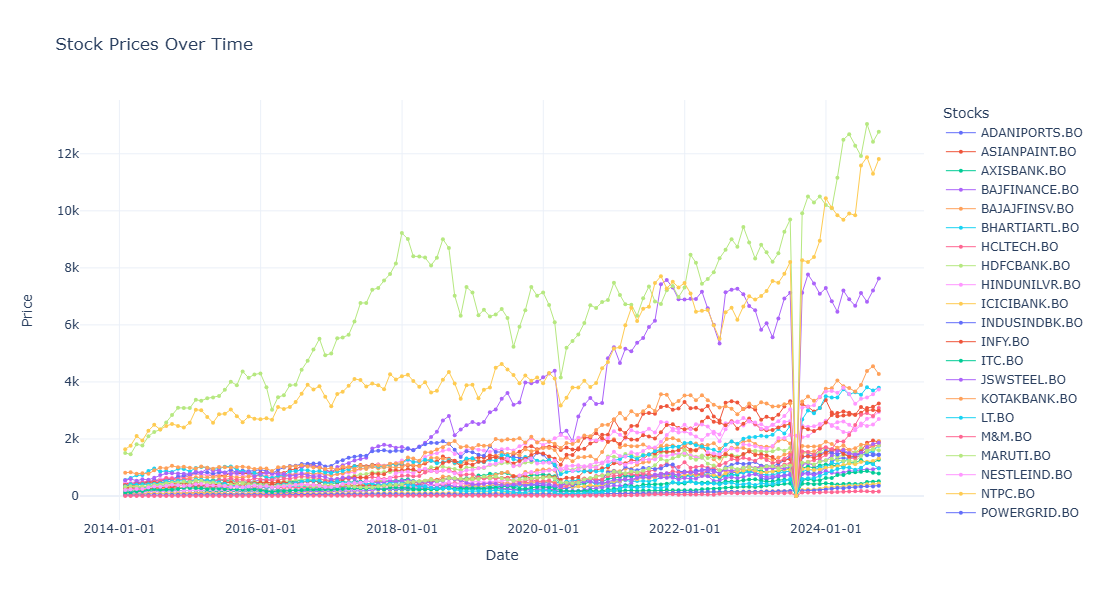

In [32]:
fig = go.Figure()

# Loop through each stock in unique_stock_list to add traces
for stock in data:
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[stock],
        mode='lines+markers',  # Add markers to the lines
        name=stock,  # Use the stock ticker as the name
        line=dict(width=1),  # Set line width smaller
        marker=dict(size=4),  # Set marker size
    ))

# Update layout for better aesthetics
fig.update_layout(
    title='Stock Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis=dict(
        tickformat='%Y-%m-%d',  # Format date for better readability
        showgrid=True,
    ),
    yaxis=dict(
        showgrid=True,
    ),
    legend_title='Stocks',
    template='plotly_white',  # Use a clean background
    hovermode='x unified',  # Unified hover mode
    width=1200,  # Set the width of the plot
    height=600,  # Set the height of the plot
)

# Show the plot
fig.show()

In [45]:
begin_formation = dt.datetime.now().date() - MonthEnd(36)
begin_formation = begin_formation.strftime('%Y-%m-%d')
print(begin_formation)


2021-09-30


In [46]:
end_formation = dt.datetime.now().date() - MonthEnd(1)
end_formation = end_formation.strftime('%Y-%m-%d')
print(end_formation)


2024-08-31


In [47]:
bse_df = df 
bse_begin_price = bse_df.loc[begin_formation]

In [48]:
bse_begin_price

ADANIPORTS.BO     729.446289
ASIANPAINT.BO    3159.921387
AXISBANK.BO       765.044312
BAJFINANCE.BO    7572.516602
BAJAJFINSV.BO    1770.397461
BHARTIARTL.BO     678.191406
HCLTECH.BO       1135.234253
HDFCBANK.BO      1538.284058
HINDUNILVR.BO    2577.131592
ICICIBANK.BO      685.041199
INDUSINDBK.BO    1079.306763
INFY.BO          1552.369995
ITC.BO            214.815613
JSWSTEEL.BO       640.804565
KOTAKBANK.BO     1999.051636
LT.BO            1668.501709
M&M.BO            788.242004
MARUTI.BO        7218.558105
NESTLEIND.BO     1403.825928
NTPC.BO           126.852272
POWERGRID.BO      113.298309
RELIANCE.BO      2492.149658
SBIN.BO           430.371948
SUNPHARMA.BO      796.026306
TCS.BO           3553.846680
TATAMOTORS.BO     331.149109
TATASTEEL.BO       57.273834
TECHM.BO         1234.759155
TITAN.BO         2137.919434
ULTRACEMCO.BO    7276.549316
Name: 2021-09-30 00:00:00, dtype: float64

In [49]:
bse_end_price = bse_df.loc[end_formation]

In [50]:
bse_end_price

ADANIPORTS.BO     1482.650024
ASIANPAINT.BO     3126.800049
AXISBANK.BO       1175.500000
BAJFINANCE.BO     7206.149902
BAJAJFINSV.BO     1782.449951
BHARTIARTL.BO     1588.949951
HCLTECH.BO        1752.150024
HDFCBANK.BO       1632.949951
HINDUNILVR.BO     2778.100098
ICICIBANK.BO      1230.150024
INDUSINDBK.BO     1426.500000
INFY.BO           1943.300049
ITC.BO             501.850006
JSWSTEEL.BO        940.950012
KOTAKBANK.BO      1781.199951
LT.BO             3703.100098
M&M.BO            2806.100098
MARUTI.BO        12421.250000
NESTLEIND.BO      2504.199951
NTPC.BO            416.399994
POWERGRID.BO       337.399994
RELIANCE.BO       3019.750000
SBIN.BO            815.650024
SUNPHARMA.BO      1820.750000
TCS.BO            4551.850098
TATAMOTORS.BO     1109.400024
TATASTEEL.BO       152.800003
TECHM.BO          1635.699951
TITAN.BO          3567.149902
ULTRACEMCO.BO    11300.650391
Name: 2024-08-31 00:00:00, dtype: float64

In [51]:
bse_returns = bse_end_price/bse_begin_price -1
bse_returns

ADANIPORTS.BO    1.032569
ASIANPAINT.BO   -0.010482
AXISBANK.BO      0.536512
BAJFINANCE.BO   -0.048381
BAJAJFINSV.BO    0.006808
BHARTIARTL.BO    1.342923
HCLTECH.BO       0.543426
HDFCBANK.BO      0.061540
HINDUNILVR.BO    0.077981
ICICIBANK.BO     0.795731
INDUSINDBK.BO    0.321682
INFY.BO          0.251828
ITC.BO           1.336190
JSWSTEEL.BO      0.468388
KOTAKBANK.BO    -0.108978
LT.BO            1.219416
M&M.BO           2.559947
MARUTI.BO        0.720738
NESTLEIND.BO     0.783839
NTPC.BO          2.282558
POWERGRID.BO     1.977979
RELIANCE.BO      0.211705
SBIN.BO          0.895221
SUNPHARMA.BO     1.287299
TCS.BO           0.280823
TATAMOTORS.BO    2.350153
TATASTEEL.BO     1.667885
TECHM.BO         0.324712
TITAN.BO         0.668515
ULTRACEMCO.BO    0.553023
dtype: float64

In [52]:
bse_winners = bse_returns.nlargest(5)
bse_winners

M&M.BO           2.559947
TATAMOTORS.BO    2.350153
NTPC.BO          2.282558
POWERGRID.BO     1.977979
TATASTEEL.BO     1.667885
dtype: float64

In [59]:
nifty_data = []

In [60]:
nifty_wiki = "https://en.wikipedia.org/wiki/NIFTY_50"

In [61]:
data = pd.read_html(nifty_wiki)[1].Symbol.to_list()
nifty_data = [f"{x}.NS" for x in data]
nifty_data

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LTIM.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHRIRAMFIN.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [62]:
nifty_tickers = []
for ticker in nifty_data:
    nifty_tickers.append(yf.download(ticker).reset_index())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [63]:
date = dt.datetime.now().date()
date = date.strftime('%Y-%m-%d')

nifty_engine = sqlalchemy.create_engine(f"sqlite:///{date}_nifty_50.db")
for frame,symbol in zip(nifty_tickers,nifty_data):
    frame.to_sql(symbol,nifty_engine,index = False)

In [64]:
a = pd.read_sql('Select Date,"Adj Close" as "SBIN.NS"   from "SBIN.NS"',nifty_engine)
a

,Date,SBIN.NS
0,1996-01-01 00:00:00.000000,12.205252
1,1996-01-02 00:00:00.000000,11.816767
2,1996-01-03 00:00:00.000000,11.501691
3,1996-01-04 00:00:00.000000,11.461929
4,1996-01-05 00:00:00.000000,11.397689
...,...,...
7212,2024-09-19 00:00:00.000000,789.950012
7213,2024-09-20 00:00:00.000000,781.700012
7214,2024-09-23 00:00:00.000000,801.849976
7215,2024-09-24 00:00:00.000000,798.250000


In [65]:
df = pd.DataFrame()

In [66]:
dfs = []
for name in nifty_data:
    query = f'SELECT date, "Adj Close" AS "{name}" FROM "{name}" WHERE date > "2010-01-01"'
    df = pd.read_sql(query, nifty_engine)
    if df.empty:
        print(f"No data returned for {name}")
    else:
        dfs.append(df)



df = pd.concat(dfs, axis=0)
df = df.reset_index(drop=True)
df 

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2010-01-04 00:00:00.000000,57.215862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05 00:00:00.000000,58.539829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06 00:00:00.000000,64.317162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07 00:00:00.000000,61.662880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08 00:00:00.000000,62.442062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176066,2024-09-19 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.349976
176067,2024-09-20 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539.099976
176068,2024-09-23 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.900024
176069,2024-09-24 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539.549988


In [67]:
df = df.groupby("Date").sum()
df

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04 00:00:00.000000,57.215862,102.360184,323.322571,157.902100,180.595245,592.825500,30.467903,34.736553,27.156008,272.333466,...,192.488800,136.417267,286.246124,77.440735,152.195312,19.329819,195.320892,65.013626,907.536255,136.399597
2010-01-05 00:00:00.000000,58.539829,105.890175,341.228027,158.400894,184.363327,595.563660,30.263662,34.813869,26.747057,276.646332,...,192.560211,140.517014,286.322235,83.445084,149.543488,19.798004,197.822083,66.346848,926.323975,138.552338
2010-01-06 00:00:00.000000,64.317162,111.139191,329.632507,157.924194,181.268768,586.356567,30.698788,33.992439,26.344358,273.715302,...,193.715378,142.340637,279.848328,84.750381,149.773666,19.582972,198.795792,67.414787,927.451233,135.750824
2010-01-07 00:00:00.000000,61.662880,109.824638,332.426636,156.313049,182.552078,576.071594,30.512306,33.726688,25.833166,275.850708,...,192.631592,140.173065,272.060394,85.048134,144.654129,19.819351,194.423538,69.091011,919.043640,133.342468
2010-01-08 00:00:00.000000,62.442062,109.695946,331.308960,158.895248,184.936737,566.539307,31.067314,33.823322,26.271324,272.207977,...,192.056152,142.535202,266.500488,85.472366,145.445999,19.778179,199.540421,68.452972,930.269470,131.337189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19 00:00:00.000000,2943.149902,1408.199951,7030.250000,3293.850098,1242.699951,11868.000000,7590.350098,1890.400024,324.450012,1664.849976,...,789.950012,1846.050049,4296.149902,1215.250000,967.000000,149.539993,1595.349976,3780.949951,11627.500000,533.349976
2024-09-20 00:00:00.000000,3008.500000,1438.699951,7082.649902,3306.949951,1245.000000,11941.700195,7582.450195,1916.800049,331.200012,1711.750000,...,781.700012,1865.750000,4284.899902,1216.849976,970.849976,152.020004,1622.050049,3797.199951,11798.299805,539.099976
2024-09-23 00:00:00.000000,3043.949951,1456.150024,7152.799805,3277.449951,1246.800049,12338.950195,7595.100098,1919.949951,338.100006,1750.449951,...,801.849976,1862.699951,4268.500000,1211.550049,971.799988,153.990005,1607.150024,3820.100098,11962.049805,534.900024


In [68]:
df.index = pd.to_datetime(df.index)
df

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,57.215862,102.360184,323.322571,157.902100,180.595245,592.825500,30.467903,34.736553,27.156008,272.333466,...,192.488800,136.417267,286.246124,77.440735,152.195312,19.329819,195.320892,65.013626,907.536255,136.399597
2010-01-05,58.539829,105.890175,341.228027,158.400894,184.363327,595.563660,30.263662,34.813869,26.747057,276.646332,...,192.560211,140.517014,286.322235,83.445084,149.543488,19.798004,197.822083,66.346848,926.323975,138.552338
2010-01-06,64.317162,111.139191,329.632507,157.924194,181.268768,586.356567,30.698788,33.992439,26.344358,273.715302,...,193.715378,142.340637,279.848328,84.750381,149.773666,19.582972,198.795792,67.414787,927.451233,135.750824
2010-01-07,61.662880,109.824638,332.426636,156.313049,182.552078,576.071594,30.512306,33.726688,25.833166,275.850708,...,192.631592,140.173065,272.060394,85.048134,144.654129,19.819351,194.423538,69.091011,919.043640,133.342468
2010-01-08,62.442062,109.695946,331.308960,158.895248,184.936737,566.539307,31.067314,33.823322,26.271324,272.207977,...,192.056152,142.535202,266.500488,85.472366,145.445999,19.778179,199.540421,68.452972,930.269470,131.337189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19,2943.149902,1408.199951,7030.250000,3293.850098,1242.699951,11868.000000,7590.350098,1890.400024,324.450012,1664.849976,...,789.950012,1846.050049,4296.149902,1215.250000,967.000000,149.539993,1595.349976,3780.949951,11627.500000,533.349976
2024-09-20,3008.500000,1438.699951,7082.649902,3306.949951,1245.000000,11941.700195,7582.450195,1916.800049,331.200012,1711.750000,...,781.700012,1865.750000,4284.899902,1216.849976,970.849976,152.020004,1622.050049,3797.199951,11798.299805,539.099976
2024-09-23,3043.949951,1456.150024,7152.799805,3277.449951,1246.800049,12338.950195,7595.100098,1919.949951,338.100006,1750.449951,...,801.849976,1862.699951,4268.500000,1211.550049,971.799988,153.990005,1607.150024,3820.100098,11962.049805,534.900024


In [69]:
df = df.resample('M').last()
df

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,56.157944,109.429367,317.571472,163.512283,186.711533,598.181885,27.395361,30.788891,22.569847,256.589752,...,172.779556,133.313065,281.105804,74.658813,127.868362,17.357948,185.678940,68.645073,873.624634,127.385597
2010-02-28,61.650215,124.386780,318.060333,159.782455,204.696457,622.123657,26.671627,33.543072,23.533817,233.937195,...,166.721237,139.345016,290.880768,76.486229,130.971375,17.518078,170.089523,79.866371,977.003723,133.195038
2010-03-31,59.509052,145.753204,339.737823,179.989822,212.660385,689.601868,28.447662,32.484882,21.618399,261.739960,...,175.495163,162.178513,298.078369,79.855537,139.534622,19.277966,162.881927,84.181580,1084.844604,138.984833
2010-04-30,71.272766,136.412903,365.280457,183.516586,231.182281,716.487000,38.078217,33.238659,21.595446,250.015900,...,194.284332,142.195801,292.255585,85.908829,160.694092,18.875357,147.817627,97.383247,913.783264,132.015457
2010-05-31,68.764183,128.558548,345.675262,184.160995,226.585114,756.190125,40.529152,42.617390,24.251581,220.161362,...,191.590485,150.607910,283.721436,88.425591,139.037415,15.271699,121.469345,101.625259,865.874756,131.651733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,3409.974854,1431.259277,5830.238770,2853.589844,1161.253784,9011.510742,6664.244629,1527.636230,304.157288,1365.142334,...,830.349976,1455.185547,3662.443604,1060.250000,920.160461,163.897827,1206.105103,3231.326660,9857.044922,438.200012
2024-06-30,3177.149902,1478.099976,6176.207031,2917.050049,1264.274292,9501.650391,7115.549805,1588.150024,294.516144,1436.047241,...,848.950012,1516.042480,3895.103271,1097.449951,989.750000,174.009995,1404.332642,3404.199951,11599.114258,514.849976
2024-07-31,3169.399902,1569.900024,6605.147461,3084.449951,1166.099976,9664.200195,6806.950195,1651.650024,339.185272,1483.284058,...,872.400024,1719.349976,4385.350098,1188.949951,1156.650024,165.330002,1554.400024,3458.949951,11887.200195,522.000000


In [70]:
nif_df = df

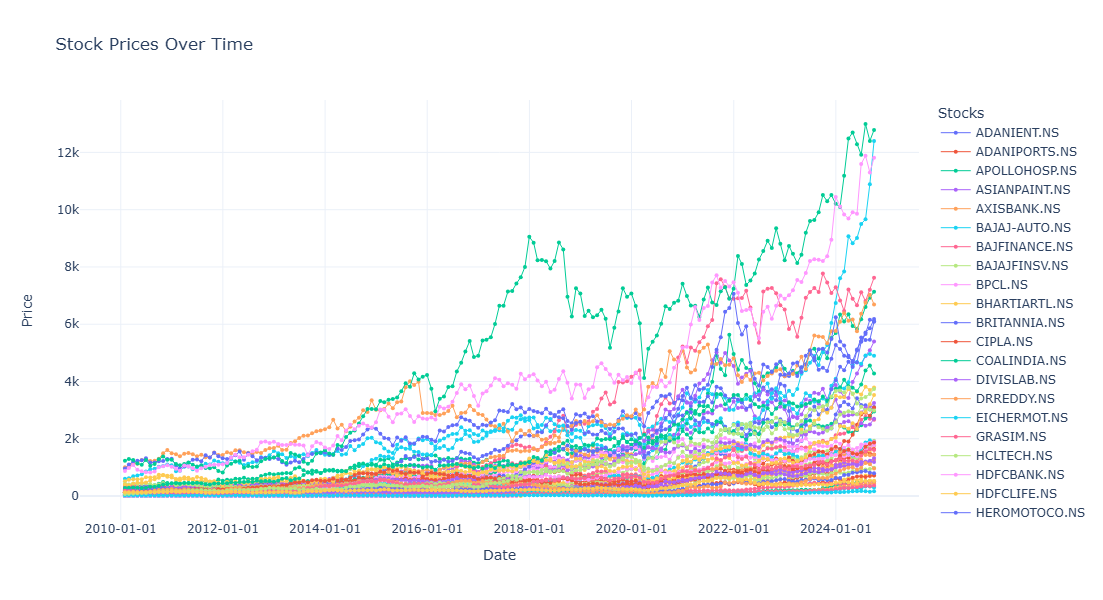

In [71]:
fig = go.Figure()

# Loop through each stock in unique_stock_list to add traces
for stock in nifty_data:
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[stock],
        mode='lines+markers',  # Add markers to the lines
        name=stock,  # Use the stock ticker as the name
        line=dict(width=1),  # Set line width smaller
        marker=dict(size=4),  # Set marker size
    ))

# Update layout for better aesthetics
fig.update_layout(
    title='Stock Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis=dict(
        tickformat='%Y-%m-%d',  # Format date for better readability
        showgrid=True,
    ),
    yaxis=dict(
        showgrid=True,
    ),
    legend_title='Stocks',
    template='plotly_white',  # Use a clean background
    hovermode='x unified',  # Unified hover mode
    width=1200,  # Set the width of the plot
    height=600,  # Set the height of the plot
)

# Show the plot
fig.show()

In [72]:
end_date = dt.datetime.now().date()
end_date = end_date - MonthEnd(1)
end_date = end_date.strftime('%Y-%m-%d')
end_date


'2024-08-31'

In [73]:
start_date = dt.datetime.now().date() - MonthEnd(12)
start_date = start_date.strftime('%Y-%m-%d')
start_date

'2023-09-30'

In [74]:
end_prices_nif = nif_df.loc[end_date]
end_prices_nif

ADANIENT.NS       3019.350098
ADANIPORTS.NS     1481.900024
APOLLOHOSP.NS     6927.500000
ASIANPAINT.NS     3126.800049
AXISBANK.NS       1175.250000
BAJAJ-AUTO.NS    10891.549805
BAJFINANCE.NS     7200.149902
BAJAJFINSV.NS     1783.050049
BPCL.NS            357.649994
BHARTIARTL.NS     1589.050049
BRITANNIA.NS      5855.250000
CIPLA.NS          1654.900024
COALINDIA.NS       524.950012
DIVISLAB.NS       5093.899902
DRREDDY.NS        7031.350098
EICHERMOT.NS      4960.500000
GRASIM.NS         2698.850098
HCLTECH.NS        1753.250000
HDFCBANK.NS       1636.900024
HDFCLIFE.NS        738.700012
HEROMOTOCO.NS     5455.399902
HINDALCO.NS        701.349976
HINDUNILVR.NS     2778.000000
ICICIBANK.NS      1229.199951
INDUSINDBK.NS     1425.250000
INFY.NS           1943.699951
ITC.NS             501.899994
JSWSTEEL.NS        941.099976
KOTAKBANK.NS      1780.800049
LT.NS             3704.649902
LTIM.NS           6156.049805
M&M.NS            2805.399902
MARUTI.NS        12403.000000
NESTLEIND.

In [75]:
start_prices_nif = nif_df.loc[start_date]
start_prices_nif

ADANIENT.NS       2412.926758
ADANIPORTS.NS      821.624878
APOLLOHOSP.NS     5125.241699
ASIANPAINT.NS     3125.302490
AXISBANK.NS       1035.900513
BAJAJ-AUTO.NS     5022.877930
BAJFINANCE.NS     7771.734863
BAJAJFINSV.NS     1539.278931
BPCL.NS            160.345795
BHARTIARTL.NS      921.265991
BRITANNIA.NS      4478.852539
CIPLA.NS          1176.177246
COALINDIA.NS       276.275696
DIVISLAB.NS       3742.181885
DRREDDY.NS        5554.109863
EICHERMOT.NS      3409.176270
GRASIM.NS         1927.300903
HCLTECH.NS        1188.553711
HDFCBANK.NS       1505.738525
HDFCLIFE.NS        635.239746
HEROMOTOCO.NS     2986.157471
HINDALCO.NS        489.841949
HINDUNILVR.NS     2424.032227
ICICIBANK.NS       943.775269
INDUSINDBK.NS     1413.161377
INFY.NS           1409.165527
ITC.NS             430.334869
JSWSTEEL.NS        773.540466
KOTAKBANK.NS      1733.799683
LT.NS             2999.967773
LTIM.NS           5143.812500
M&M.NS            1542.952393
MARUTI.NS        10511.316406
NESTLEIND.

In [76]:
returns_nif = end_prices_nif/start_prices_nif - 1

In [77]:
returns_nif

ADANIENT.NS      0.251323
ADANIPORTS.NS    0.803621
APOLLOHOSP.NS    0.351644
ASIANPAINT.NS    0.000479
AXISBANK.NS      0.134520
BAJAJ-AUTO.NS    1.168388
BAJFINANCE.NS   -0.073547
BAJAJFINSV.NS    0.158367
BPCL.NS          1.230492
BHARTIARTL.NS    0.724855
BRITANNIA.NS     0.307310
CIPLA.NS         0.407016
COALINDIA.NS     0.900095
DIVISLAB.NS      0.361211
DRREDDY.NS       0.265972
EICHERMOT.NS     0.455044
GRASIM.NS        0.400326
HCLTECH.NS       0.475112
HDFCBANK.NS      0.087108
HDFCLIFE.NS      0.162868
HEROMOTOCO.NS    0.826896
HINDALCO.NS      0.431788
HINDUNILVR.NS    0.146024
ICICIBANK.NS     0.302429
INDUSINDBK.NS    0.008554
INFY.NS          0.379327
ITC.NS           0.166301
JSWSTEEL.NS      0.216614
KOTAKBANK.NS     0.027108
LT.NS            0.234897
LTIM.NS          0.196787
M&M.NS           0.818203
MARUTI.NS        0.179966
NESTLEIND.NS     0.125575
NTPC.NS          0.741688
ONGC.NS          0.815588
POWERGRID.NS     0.765230
RELIANCE.NS      0.291896
SBILIFE.NS  

In [78]:
winners_nifty = returns_nif.nlargest(5)
winners_nifty

BPCL.NS          1.230492
BAJAJ-AUTO.NS    1.168388
COALINDIA.NS     0.900095
HEROMOTOCO.NS    0.826896
M&M.NS           0.818203
dtype: float64